In [2]:
import os
import json
import pandas as pd

In [3]:
d = "/mnt/c/Users/trang.le/Desktop/shapemode"
PC = "PC1"
bins = [0,1,2]
df = pd.DataFrame()
for b in bins:
    f = open(f"{d}/covar/{PC}_{b}_cluster_assignation.json","r")
    cluster_assignation = json.load(f)
    bin_ = [cluster_assignation["ensembl_ids"][1:]] + [cluster_assignation["assignation"]] + [cluster_assignation["max_intensity"][1:]] + [cluster_assignation["mean_intensity"][1:]]
    tmp = pd.DataFrame(bin_).transpose()
    tmp.columns = ["ensembl_ids", f"assignation_b{b}", f"max_b{b}", f"mean_b{b}"]
    if df.empty:
        df = tmp
    else:
        df = df.merge(tmp, on="ensembl_ids")
#covar_mat = pd.read_csv(f"{d}/covar/{PC}_{b}.csv")

In [76]:
df.shape

(9621, 10)

In [95]:
df["FC0_1"] = df["mean_b0"]/df["mean_b1"]
df["FC2_1"] = df["mean_b2"]/df["mean_b1"]
df["FC2_0"] = df["mean_b2"]/df["mean_b0"]
df["FC0_2"] = df["mean_b0"]/df["mean_b2"]

In [13]:
mappings = pd.read_csv(f"{d}/sl_pHPA_15_0.05_euclidean_100000_rmoutliers_ilsc_3d_bbox_rm_border.csv")
mappings = mappings[mappings.atlas_name=="U-2 OS"]

In [96]:
df_sub = df.merge(mappings[["ensembl_ids","gene_names"]].drop_duplicates(), on="ensembl_ids")
df_sub.shape

(9621, 15)

In [87]:
df_sub.columns


Index(['ensembl_ids', 'assignation_b0', 'max_b0', 'mean_b0', 'assignation_b1',
       'max_b1', 'mean_b1', 'assignation_b2', 'max_b2', 'mean_b2', 'FC0_1',
       'FC2_1', 'FC2_0', 'gene_names'],
      dtype='object')

In [97]:
df_sub = df_sub[df_sub.FC0_2 > 1.5]
df_sub.shape, df_sub.mean_b0.nunique(), df_sub.columns

((1516, 15),
 1510,
 Index(['ensembl_ids', 'assignation_b0', 'max_b0', 'mean_b0', 'assignation_b1',
        'max_b1', 'mean_b1', 'assignation_b2', 'max_b2', 'mean_b2', 'FC0_1',
        'FC2_1', 'FC2_0', 'FC0_2', 'gene_names'],
       dtype='object'))

In [98]:
import gseapy
save_dir = f"{d}/gsea"
databases = ['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'WikiPathway_2021_Human', 'KEGG_2021_Human']
gene_list = df_sub.gene_names.unique().tolist()
gene_list = [g.split(",")[0] for g in gene_list]
print(len(gene_list))
enr = gseapy.enrichr(gene_list=list(gene_list), gene_sets=databases, organism="human",
                 outdir=f'{save_dir}/{PC}_FC0_2_larger_1.5', background='hsapiens_gene_ensembl', cutoff=0.1, format='pdf')

1515


2022-10-25 17:20:15,222 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.1
2022-10-25 17:20:28,392 Warning: No enrich terms using library WikiPathway_2021_Human when cutoff = 0.1
2022-10-25 17:20:33,009 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.1


In [99]:
gene_list

['SCYL3',
 'LAS1L',
 'CYP51A1',
 'LAP3',
 'CD99',
 'TMEM176A',
 'ALS2',
 'SARM1',
 'ARHGAP33',
 'SLC25A31',
 'FAM214B',
 'CROT',
 'ITGA3',
 'ABCC8',
 'TMEM132A',
 'TNFRSF12A',
 'PRSS21',
 'JARID2',
 'SS18L2',
 'PGLYRP1',
 'HEATR5B',
 'UBE3C',
 'UQCRC1',
 'STARD3NL',
 'ZNF200',
 'SCMH1',
 'TTC19',
 'PIK3C2A',
 'CALCOCO1',
 'PSMC4',
 'SLC7A14',
 'CAPN1',
 'MARCO',
 'CD74',
 'ZFP64',
 'RUNX3',
 'FHL1',
 'NLRP2',
 'ZNF839',
 'GRAMD1B',
 'DERA',
 'TOMM34',
 'MIPEP',
 'ARNTL2',
 'GRN',
 'FAM13B',
 'FUT8',
 'APBA2',
 'ADSS',
 'AC104662.2',
 'ZFYVE16',
 'RAI14',
 'RETSAT',
 'PHKA2',
 'ATP6V1H',
 'C12orf4',
 'SCML1',
 'GOPC',
 'ROS1',
 'FAM120A',
 'TNFRSF9',
 'AL035078.4',
 'PPP1R3F',
 'PIK3CB',
 'RRP12',
 'HHAT',
 'LAMC2',
 'ATP2B4',
 'NDC1',
 'ALDH18A1',
 'TARBP1',
 'SLC2A14',
 'HDAC7',
 'ARSF',
 'GPBP1',
 'ELMO2',
 'VMP1',
 'EIF4B',
 'SLC6A16',
 'ADCK1',
 'INTS13',
 'SPA17',
 'TSPAN32',
 'TNPO3',
 'BORCS8-MEF2B',
 'DGKA',
 'ADAT1',
 'ZC3H15',
 'PRKCQ',
 'DIP2B',
 'ELOVL1',
 'ZNRD1',
 'ATXN3'

In [12]:
from gseapy import gseaplot, heatmap
gene_exp = 
mappings[mappings.ensembl_ids.isin(gene_list)]
gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='./tests/extdata/h.all.v7.0.symbols.gmt', # or enrichr library names
                 cls= "./tests/extdata/Leukemia.cls", # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 method='signal_to_noise',
                 threads=4, seed= 7)

dict_keys(['assignation', 'ensembl_ids', 'max_intensity', 'mean_intensity'])

In [13]:
bin_0 = [cluster_assignation["ensembl_ids"][1:]] + [cluster_assignation["assignation"]] + [cluster_assignation["max_intensity"][1:]] + [cluster_assignation["mean_intensity"][1:]]

In [20]:
cluster_assignation.keys()

dict_keys(['assignation', 'ensembl_ids'])

In [6]:
df0 = pd.read_csv(f"{d}/covar/{PC}_0_intensities.csv")
df1 = pd.read_csv(f"{d}/covar/{PC}_1_intensities.csv")

In [7]:
df0.shape, df1.shape

((5376, 9724), (5376, 9777))

In [10]:
df0.columns

Index(['Unnamed: 0', 'ENSG00000000003', 'ENSG00000000457', 'ENSG00000000938',
       'ENSG00000001084', 'ENSG00000001167', 'ENSG00000001460',
       'ENSG00000001461', 'ENSG00000001497', 'ENSG00000001629',
       ...
       'ENSG00000278318', 'ENSG00000278535', 'ENSG00000278540',
       'ENSG00000278619', 'ENSG00000278845', 'ENSG00000283632',
       'ENSG00000284308', 'ENSG00000284723', 'ENSG00000284753,ENSG00000284917',
       'ENSG00000284906,ENSG00000285077'],
      dtype='object', length=9724)

In [12]:
df0 = df0.drop(['Unnamed: 0'], axis=1).transpose()

In [16]:
df0["ensembl_ids"] = df0.index
df0 =  df0.merge(mappings[["ensembl_ids","gene_names"]].drop_duplicates(), on="ensembl_ids")

In [18]:
df0.gene_names.value_counts()

DIABLO                  2
FAM212B                 2
ABCF2                   2
TSPAN6                  1
ZNF12                   1
                       ..
AMD1                    1
NDUFAF4                 1
USP45                   1
MORF4L2                 1
AC091057.5,ARHGAP11B    1
Name: gene_names, Length: 9720, dtype: int64

In [19]:
mappings.shape,mappings.gene_names.value_counts()

((262802, 20),
 PLPPR1     157
 TRAF4      151
 LRRD1      150
 SEMA6C     130
 SNW1       127
           ... 
 ESR1         7
 ZDHHC15      7
 PPCS         7
 MED31        7
 AFG3L2       7
 Name: gene_names, Length: 10009, dtype: int64)

(array([4.591e+03, 3.664e+03, 1.242e+03, 3.290e+02, 1.200e+02, 4.800e+01,
        6.000e+00, 4.000e+00, 2.000e+00, 3.000e+00]),
 array([  7.,  22.,  37.,  52.,  67.,  82.,  97., 112., 127., 142., 157.]),
 <BarContainer object of 10 artists>)

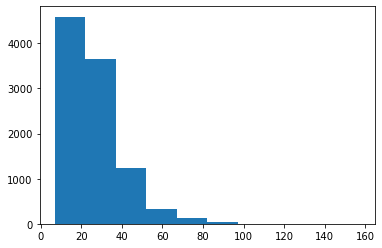

In [25]:
import matplotlib.pyplot as plt
plt.hist(mappings.gene_names.value_counts().values)